In [1]:
import numpy as np
import pandas as pd


In [59]:
import altair as alt
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [28]:
dep_arr_df = pd.read_pickle("../data/processed/dep_arr_df4_twymaxoccAndNextAvgDelay.pkl")

In [4]:
dep_arr_df

flight_id            on_runway_time taxi_holding_time  \
0      GSW4942_15738 2019-10-01 04:00:28+00:00   0 days 00:01:23   
1        EDW200_5718 2019-10-01 04:10:37+00:00   0 days 00:01:18   
2       SWR177_15809 2019-10-01 04:05:11+00:00   0 days 00:00:00   
3       SWR139_15706 2019-10-01 04:07:25+00:00   0 days 00:00:00   
4       SWR296_13638 2019-10-01 04:09:53+00:00   0 days 00:00:00   
...              ...                       ...               ...   
36005   SWR176_15653 2019-11-30 22:02:47+00:00   0 days 00:02:16   
36006   SWR288_13280 2019-11-30 21:49:46+00:00   0 days 00:02:03   
36007   THY8HD_18663 2019-11-30 21:49:30+00:00   0 days 00:00:00   
36008    SWR92_15689 2019-11-30 22:04:18+00:00   0 days 00:03:29   
36009   SWR138_15564 2019-11-30 22:12:48+00:00   0 days 00:00:00   

      rwy_holding_time total_holding_time  taxi_holding_time_minutes  \
0                 None    0 days 00:01:23                   1.383333   
1                 None    0 days 00:04:56                   1.300000   
2                 None    0 days 00:00:00                   0.000000   
3                 None    0 days 00:00:00                   0.000000   
4                 None    0 days 00:00:00                   0.000000   
...                ...                ...                        ...   
36005             None    0 days 00:15:41                   2.266667   
36006             None    0 days 00:02:03                   2.050000   
36007             None    0 days 00:00:00                   0.000000   
36008             None    0 days 00:09:35                   3.483333   
36009             None    0 days 00:00:00                   0.000000   

                 first_movement callsign registration typecode  ...    N    A  \
0     2019-10-01 03:59:06+00:00  GSW4942       HB-JOG     A319  ...  0.0  0.0   
1     2019-10-01 04:03:36+00:00   EDW200       HB-IHZ     A320  ...  0.0  0.0   
2     2019-10-01 04:05:48+00:00   SWR177       HB-JNI     B77W  ...  0.0  1.0   
3     2019-10-01 04:07:33+00:00   SWR139       HB-JNG     B77W  ...  0.0  1.0   
4     2019-10-01 04:10:25+00:00   SWR296       HB-JHM     A333  ...  0.0  1.0   
...                         ...      ...          ...      ...  ...  ...  ...   
36005 2019-11-30 21:44:51+00:00   SWR176       HB-JNJ     B77W  ...  0.0  0.0   
36006 2019-11-30 21:46:26+00:00   SWR288       HB-JHI     A333  ...  0.0  0.0   
36007 2019-11-30 21:49:52+00:00   THY8HD       TC-JTN     A321  ...  0.0  0.0   
36008 2019-11-30 21:53:56+00:00    SWR92         None     None  ...  0.0  0.0   
36009 2019-11-30 22:11:16+00:00   SWR138       HB-JNH     B77W  ...  0.0  0.0   

         M    M    Y    R    G    Z    P nextAvgDelay  
0      1.0  0.0  0.0  0.0  0.0  0.0  0.0     3.455556  
1      1.0  0.0  0.0  0.0  0.0  0.0  0.0     3.925000  
2      1.0  0.0  0.0  0.0  0.0  0.0  0.0          NaN  
3      1.0  0.0  0.0  0.0  0.0  0.0  0.0          NaN  
4      1.0  0.0  0.0  0.0  0.0  0.0  0.0          NaN  
...    ...  ...  ...  ...  ...  ...  ...          ...  
36005  1.0  0.0  0.0  0.0  0.0  0.0  0.0     9.105556  
36006  1.0  0.0  0.0  0.0  0.0  0.0  0.0     9.105556  
36007  1.0  0.0  0.0  0.0  0.0  0.0  0.0     9.105556  
36008  1.0  0.0  0.0  0.0  0.0  0.0  0.0     9.105556  
36009  0.0  0.0  0.0  0.0  0.0  0.0  0.0     9.105556  

[36010 rows x 86 columns]

In [7]:
dep_df = dep_arr_df.query("mvt_type=='DEP'").sort_values('first_movement_start')

# SFCI: number of dep/arr resp having a taxiing period overlapping with current aircraft

In [8]:
dep_df
on_runway_time
first_movement_start

Index(['flight_id', 'on_runway_time', 'taxi_holding_time', 'rwy_holding_time',
       'total_holding_time', 'taxi_holding_time_minutes', 'first_movement',
       'callsign', 'registration', 'typecode', 'icao24', 'firstseen_min',
       'start', 'stop', 'duration', 'cumdist_max', 'parking_position',
       'parking_position_duration', 'runway', 'pb_duration', 'end_pb',
       'duration_minutes', 'parking_position_duration_minutes',
       'pb_duration_minutes', 'first_movement_start', 'taxi_dist',
       'total_holding_time_minutes', 'real_dur', 'real_dur_minutes', 'airline',
       'hh', 'hh_num', 'angle_sum', 'avg_speed', 'mvt_type', 'taxiing_stop',
       'avg_outbound_delay_lastXmin', 'turnaround', 'turnaround_minutes',
       'nominal', 'busy', 'disrupted', 'not_nom_arrival_ratio', 'press',
       'temp', 'atmap_visibility', 'atmap_wind', 'atmap_precipitation',
       'atmap_freezing', 'atmap_danger', 'atmap_score', 'config', 'nb_arr',
       'nb_dep', 'nb', 'icao_wtc', 'L/M', 'H_c

In [9]:
flight_df=dep_df

In [14]:

def compute_scfi(dep_arr_df, mvt_type='DEP'):
    """
    Based on end_pb and first_movement_start columns to know how many aircraft are taxiing while one is during pushback
    Consider passing only departures in flight_df (dep_df) counts should be specific 
    to that type of movement
    
    refers to the number of
    departures and arrivals, given the dataframe given, whose taxiing period has
    overlap with the taxiing period of d0 . The
    """
    flight_df=dep_arr_df # to not change directly the input dataframe
    for i, r in flight_df.sort_values("first_movement_start").iterrows():
        if r.end_pb == r.end_pb and r.first_movement_start == r.first_movement_start:
            t0 = r.first_movement_start
            t1 = r.on_runway_time
            # count overlaps between other flights duration and current flight pushback
            temp = flight_df.loc[
                (flight_df.index != i)
                & (flight_df.mvt_type==mvt_type)
                & ~(
                    (flight_df.first_movement_start > t1)
                    | (flight_df.on_runway_time < t0)
                )
                
            ]
            flight_df.loc[i, f"scfi_{mvt_type}"] = len(temp)
    flight_df[f"scfi_{mvt_type}"] = flight_df[f"scfi_{mvt_type}"].fillna(0)
    return flight_df



In [15]:
sfci_dep = compute_scfi(dep_arr_df, mvt_type='DEP')
sfci_arr = compute_scfi(dep_arr_df, mvt_type='ARR')

In [17]:

def compute_aqli(dep_arr_df, mvt_type='DEP'):
    """
    Based on end_pb and first_movement_start columns to know how many aircraft are taxiing while one is during pushback
    Consider passing only departures in flight_df (dep_df) counts should be specific 
    to that type of movement
    
    refers to the number of departures and arrivals, given the dataframe given, whose taxiing period has
    overlap with the taxiing period of d0
    """
    flight_df=dep_arr_df # to not change directly the input dataframe
    for i, r in flight_df.sort_values("first_movement_start").iterrows():
        if r.end_pb == r.end_pb and r.first_movement_start == r.first_movement_start:
            t0 = r.first_movement_start
            t1 = r.on_runway_time
            # count overlaps between other flights duration and current flight pushback
            temp = flight_df.loc[
                (flight_df.index != i)
                & (flight_df.mvt_type==mvt_type)
                & (flight_df.on_runway_time > t0)
                & (flight_df.on_runway_time < t1)
            ]
            flight_df.loc[i, f"aqli_{mvt_type}"] = len(temp)
    flight_df[f"aqli_{mvt_type}"] = flight_df[f"aqli_{mvt_type}"].fillna(0)
    return flight_df



# Little data analysis

In [29]:
dep_arr_df = compute_aqli(dep_arr_df, mvt_type="DEP")
dep_arr_df = compute_scfi(dep_arr_df, mvt_type="DEP")
dep_arr_df = compute_aqli(dep_arr_df, mvt_type="ARR")
dep_arr_df = compute_scfi(dep_arr_df, mvt_type="ARR")


Index(['flight_id', 'on_runway_time', 'taxi_holding_time', 'rwy_holding_time',
       'total_holding_time', 'taxi_holding_time_minutes', 'first_movement',
       'callsign', 'registration', 'typecode', 'icao24', 'firstseen_min',
       'start', 'stop', 'duration', 'cumdist_max', 'parking_position',
       'parking_position_duration', 'runway', 'pb_duration', 'end_pb',
       'duration_minutes', 'parking_position_duration_minutes',
       'pb_duration_minutes', 'first_movement_start', 'taxi_dist',
       'total_holding_time_minutes', 'real_dur', 'real_dur_minutes', 'airline',
       'hh', 'hh_num', 'angle_sum', 'avg_speed', 'mvt_type', 'taxiing_stop',
       'avg_outbound_delay_lastXmin', 'turnaround', 'turnaround_minutes',
       'nominal', 'busy', 'disrupted', 'not_nom_arrival_ratio', 'press',
       'temp', 'atmap_visibility', 'atmap_wind', 'atmap_precipitation',
       'atmap_freezing', 'atmap_danger', 'atmap_score', 'config', 'nb_arr',
       'nb_dep', 'nb', 'icao_wtc', 'L/M', 'H_c

In [30]:
dep_arr_df = pd.read_pickle("../data/processed/dep_arr_df5_sifiAqliScfi.pkl")

In [31]:
dep_arr_df.columns

Index(['flight_id', 'on_runway_time', 'taxi_holding_time', 'rwy_holding_time',
       'total_holding_time', 'taxi_holding_time_minutes', 'first_movement',
       'callsign', 'registration', 'typecode', 'icao24', 'firstseen_min',
       'start', 'stop', 'duration', 'cumdist_max', 'parking_position',
       'parking_position_duration', 'runway', 'pb_duration', 'end_pb',
       'duration_minutes', 'parking_position_duration_minutes',
       'pb_duration_minutes', 'first_movement_start', 'taxi_dist',
       'total_holding_time_minutes', 'real_dur', 'real_dur_minutes', 'airline',
       'hh', 'hh_num', 'angle_sum', 'avg_speed', 'mvt_type', 'taxiing_stop',
       'avg_outbound_delay_lastXmin', 'turnaround', 'turnaround_minutes',
       'NDepDep', 'nominal', 'busy', 'disrupted', 'not_nom_arrival_ratio',
       'press', 'temp', 'atmap_visibility', 'atmap_wind',
       'atmap_precipitation', 'atmap_freezing', 'atmap_danger', 'atmap_score',
       'config', 'nb_arr', 'nb_dep', 'nb', 'icao_wtc', 

<AxesSubplot:>

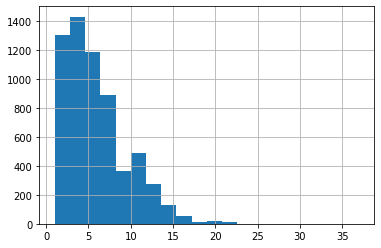

In [35]:
dep_arr_df.query("scfi_DEP>0")['scfi_DEP'].hist(bins=20)

<AxesSubplot:>

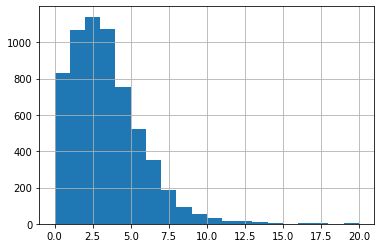

In [36]:
dep_arr_df.query("scfi_DEP>0")['aqli_ARR'].hist(bins=20)

<AxesSubplot:>

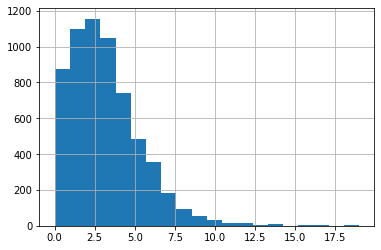

In [37]:
dep_arr_df.query("scfi_DEP>0")['scfi_ARR'].hist(bins=20)

<AxesSubplot:>

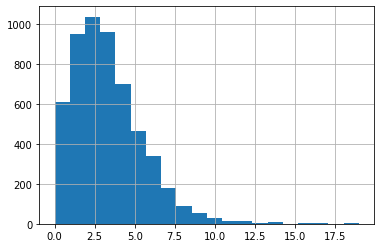

In [38]:
dep_arr_df.query("aqli_DEP>0")['scfi_ARR'].hist(bins=20)

In [41]:
dep_arr_df.query('mvt_type=="DEP"')[[ 'aqli_DEP', 'scfi_DEP', 'aqli_ARR', 'scfi_ARR']].describe()

aqli_DEP      scfi_DEP      aqli_ARR      scfi_ARR
count  16932.000000  16932.000000  16932.000000  16932.000000
mean       1.189995      2.082093      1.097862      1.077014
std        2.241170      3.591575      2.012260      1.992893
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000
75%        2.000000      3.000000      2.000000      2.000000
max       30.000000     37.000000     20.000000     19.000000

In [50]:
import altair as alt

In [51]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [64]:
sifi_cols = ["aqli_DEP", "scfi_DEP", "aqli_ARR", "scfi_ARR"]
datachart = dep_arr_df.query('mvt_type=="DEP"')[
    ["total_holding_time_minutes", "nextAvgDelay"] + sifi_cols
]
alt.Chart(datachart).transform_fold(sifi_cols).transform_filter(
    "datum.value<17"
).mark_boxplot(outliers=False).encode(
    x=alt.X("value:O"),
    y=alt.Y("total_holding_time_minutes", title="Additional taxi-out time"),
    facet=alt.Facet("key:N", columns=2),
).properties(
    title="Taxi Situation Indices impact on additional outbound taxi time"
)

alt.Chart(...)

In [70]:
sifi_cols = ["aqli_DEP", "scfi_DEP", "aqli_ARR", "scfi_ARR"]
datachart = dep_arr_df.query('mvt_type=="DEP"')[
    ["total_holding_time_minutes", "nextAvgDelay"] + sifi_cols
]
alt.Chart(datachart).transform_fold(sifi_cols).transform_filter(
    "datum.value<17"
).mark_boxplot(outliers=False).encode(
    x=alt.X("value:O"),
    y=alt.Y("nextAvgDelay", title="Additional taxi-out time"),
    facet=alt.Facet("key:N", columns=2, title=""),
).properties(
    title="Taxi Situation Indices impact on the average additional outbound taxi time",
    # align="center",
)

alt.Chart(...)

# Compute average speed last X aircraft ?

<AxesSubplot:>

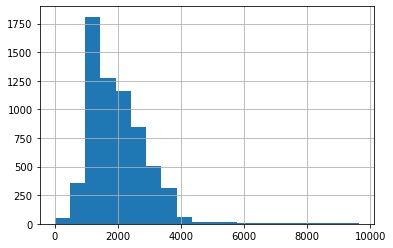

In [48]:
dep_arr_df.query("taxi_dist<10000 & end_pb==end_pb").taxi_dist.hist(bins=20)